# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [25]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [26]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [27]:
data.race.describe()


count     4870
unique       2
top          w
freq      2435
Name: race, dtype: object

In [28]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [29]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

#### Observations

* Sample has 4870 data points; out of which half of them (2435) have been randomly tagged as 'w' and the other half as 'b'
* Out of the 2435 'w' sounding names, 235 (9.65%) received call backs
* Out of the 2435 'b' sounding names, 157 (6.45%) received call backs

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

* Two-sample test would be appropriate for this problem
* We have 2435 independent data points for both 'b' and 'w' sounding names. The number of success = 157 and 235 for 'b' and 'w', respectively. The 'Normal' conditions are met and hence, we can use CLT to claim that the resulting sum will have Normal distribution
* H0 Hypothesis 'b' and 'w' sounding names have the same calling rates and distribution
* Ha Hypothesis 'b' and 'w' sounding names does not have the same calling rates and distribution

### Q3

In [30]:
w = data[data.race=='w']
b = data[data.race=='b']

In [31]:
# Your solution to Q3 here

#### Frequentist Approach

###### Hypothesis Testing and p-value

* H0 hypothesis: 'b.call' and 'w.call' have the same distribution (and mean/std)* 
* Computation of Standard error of mean for (w.call - b.call) = sqrt(var(call)/n_b + var(call)/n_w), where
* call = w.call and b.call combined
* var(call) = variance of call = mean(call) * (1-mean(call))
* n_b and n_w are the number of 'b' and 'w' sounding name samples = 2345

In [32]:
std_call = np.std(data.call)
mean_call_b, mean_call_w = np.mean(b.call), np.mean(w.call)
diff_of_means = mean_call_w-mean_call_b
# Hypothesis Testing via Frequentist Approach
se = np.sqrt(std_call**2/len(b.call) + std_call**2/len(w.call))
z = (diff_of_means-0)/se
p = 2*stats.norm.sf(z)
print('Standard Error (SE) = %.3f' %se)
print('Difference of Means Observed (w-b) = %.3f' %(diff_of_means))
print('Z-statistic for the observed mean difference (%.3f) = %.3f' %((mean_call_w-mean_call_b), z) )
print('p-value using z-statistics = %.3e' %p)

Standard Error (SE) = 0.008
Difference of Means Observed (w-b) = 0.032
Z-statistic for the observed mean difference (0.032) = 4.108
p-value using z-statistics = 3.983e-05


#### Margin of Error and Confidence Interval of the observed value

* Use 5% significance level of the observed value for MOE and CI calculation
* Note: The std used to compute the SE for this case is sqrt( var(b.call)/n_b + var(w.call)/n_w ). This is because, we are not assuming the H0 here. We are just interested in finding out the margin of error and confidence interval of our observation

In [33]:
# Margin of Error and Confidence Interval of the observed value
std_call, std_call_b, std_call_w = np.std(data.call), np.std(b.call), np.std(w.call)
mean_call, mean_call_b, mean_call_w = np.mean(data.call), np.mean(b.call), np.mean(w.call)
diff_of_means = mean_call_w-mean_call_b

se = np.sqrt(std_call_b**2/len(b.call) + std_call_w**2/len(w.call))
margin_of_error = stats.norm.ppf(.975)*se
confidence_interval = [diff_of_means-margin_of_error, diff_of_means+margin_of_error]
print('Difference of Means Observed (w-b) = %.3f' %(diff_of_means))
print('Margin of Error (Frequentist Method) = %.3f' %margin_of_error)
print('95%% Confidence interval of Observed Mean Difference (Frequentist Method) = [%.3f, %.3f]' %(confidence_interval[0], confidence_interval[1]))

Difference of Means Observed (w-b) = 0.032
Margin of Error (Frequentist Method) = 0.015
95% Confidence interval of Observed Mean Difference (Frequentist Method) = [0.017, 0.047]


#### Bootstrap Method

###### Hypothesis Testing and p-value

* H0 hypothesis: 'b.call' and 'w.call' have the same distribution (and mean/std)
* Since b.call and w.call have the same distribution, we will combine the two data and use 'Permutation' based approach to get bootstrap replicates

In [34]:
# Hypothesis testing of H0 using 2-Sample Permutation based testing
size = 100000
bs_replicates = np.empty(size)
diff_of_means = np.mean(w.call) - np.mean(b.call)
all_calls = np.concatenate((w.call, b.call))
for i in range(size):
    bs_samples = np.random.permutation(all_calls)
    bs_samples_w = bs_samples[:len(w.call)]
    bs_samples_b = bs_samples[len(w.call):]
    bs_replicates[i] = np.mean(bs_samples_w) - np.mean(bs_samples_b)
p = np.sum(np.abs(bs_replicates)>np.abs(diff_of_means))/len(bs_replicates)
print('Difference of Means Observed (w-b) = %.3f' %(diff_of_means))
print('p-value for the observed diff of means = %.1e' %p)

Difference of Means Observed (w-b) = 0.032
p-value for the observed diff of means = 1.0e-05


#### Margin of Error and Confidence Interval of the observed value

* We are aiming to get the 95% confidence interval for the observed mean difference
* Hence we cannot combine the b.call and w.call samples
* We have to use Bootstrap method to get samples for 'b' and 'w' using their respective data (without permutation)

In [35]:
# Margin of Error and Confidence Interval of the observed value
size = 10000
bs_replicates = np.empty(size)
diff_of_means = np.mean(w.call) - np.mean(b.call)
for i in range(size):
    bs_samples_w = np.random.choice(w.call, len(w.call))
    bs_samples_b = np.random.choice(b.call, len(b.call))
    bs_replicates[i] = np.mean(bs_samples_w) - np.mean(bs_samples_b)

confidence_interval = np.percentile(bs_replicates, [0.05, 0.5, 2.5, 97.5, 99.5, 99.95])
margin_of_error = (confidence_interval[3]-confidence_interval[2])*0.5
print('Difference of Means Observed (w-b) = %.3f' %(diff_of_means))
print('Margin of Error (Bootstrap Method) for 95%% Confidence Interval = %.3f' %margin_of_error)
print('95%%   Confidence interval of Observed Mean Difference = [%.3f, %.3f]' %(confidence_interval[2], confidence_interval[3]))
print('99%%   Confidence interval of Observed Mean Difference = [%.3f, %.3f]' %(confidence_interval[1], confidence_interval[4]))
print('99.9%% Confidence interval of Observed Mean Difference = [%.3f, %.3f]' %(confidence_interval[0], confidence_interval[5]))

Difference of Means Observed (w-b) = 0.032
Margin of Error (Bootstrap Method) for 95% Confidence Interval = 0.015
95%   Confidence interval of Observed Mean Difference = [0.017, 0.048]
99%   Confidence interval of Observed Mean Difference = [0.012, 0.053]
99.9% Confidence interval of Observed Mean Difference = [0.008, 0.060]


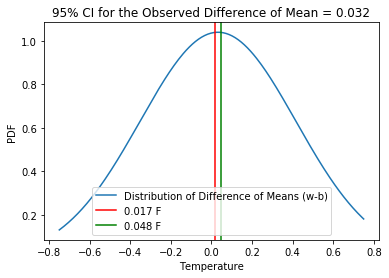

In [38]:
#Plot to show the 95% Confidence Interval
mu, sigma = np.mean(w.call) - np.mean(b.call), np.sqrt(np.var(w.call)+np.var(b.call))
x=np.linspace(-0.75, 0.75, 200)
y=1/np.sqrt(2*np.pi*sigma**2)*np.e**(-(x-mu)**2/(2*sigma**2))
plt.plot(x, y)
plt.axvline(x=confidence_interval[2], color='red')
plt.axvline(x=confidence_interval[3], color='green')
plt.title('95% CI for the Observed Difference of Mean = {0:.3f}'.format(mu))
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.legend(('Distribution of Difference of Means (w-b)', "{0:.3f} F".format(confidence_interval[2]), "{0:.3f} F".format(confidence_interval[3])))
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Racial Discrimination in the US Job Market continues to be pervasive. In this problem, we investigated data to see if 'black' or 'white' sounding names have any impact in the job call back rates.
We assumed a null hypothesis H0: both 'black' sounding names and 'white' sounding names have identical job call back rates. Using Hypothesis testing, we obtained a p-value for the observed difference in the average job calling rate assuming H0 as 4x10−5. This is way lower than our accepted 5% significance level. Hence, we reject this H0 hypothesis and accept the alternate Ha hypothesis: 'black' and 'white' sounding names does not have the same calling rates and distribution. In other words, race do seem to play a significant role in job call back rates.

This doesnt mean that race/name is the most important factor in callback success. The callback rates in the sample set was just 10%. Clearly, there are other factors other than just race that would determine the callback success. For example, education level, job experience, skills would be way more important in callback success. We would have to look at the remaining columns in the data and repeat the above analysis to judge its importance in job callback rates.